In [1]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [2]:
def generator(semillas, a, c, m, n, minimo, maximo):
    """
    Genera una secuencia de n números pseudoaleatorios dentro de un
    rango especificado utilizando el método congruencial con
    múltiples semillas.
    semillas: lista de semillas iniciales
    a: multiplicador
    c: constante aditiva
    m: módulo
    n: cantidad de números a generar por semilla
    minimo: valor mínimo del rango
    maximo: valor máximo del rango
    """
    numeros = []
    rango = maximo - minimo
    for semilla in semillas:
        xi = semilla
        for _ in range(n):
            xi = (a * xi + c) % m
            numeros.append(int(minimo + rango * (xi / m)))
    return numeros


In [3]:
semillas = [1, 2, 3, 4, 5] # lista de 5 semillas iniciales
numbers = generator(semillas, 48271, 0, 2**31 - 1, 100, 1000, 2000)
numbers

[1000,
 1085,
 1601,
 1891,
 1967,
 1189,
 1514,
 1398,
 1262,
 1743,
 1089,
 1560,
 1582,
 1809,
 1591,
 1511,
 1876,
 1995,
 1726,
 1966,
 1297,
 1426,
 1899,
 1652,
 1901,
 1961,
 1164,
 1857,
 1906,
 1294,
 1936,
 1414,
 1308,
 1514,
 1395,
 1789,
 1689,
 1544,
 1592,
 1093,
 1609,
 1432,
 1599,
 1844,
 1492,
 1772,
 1071,
 1191,
 1223,
 1780,
 1083,
 1181,
 1616,
 1579,
 1739,
 1314,
 1438,
 1411,
 1908,
 1992,
 1577,
 1163,
 1698,
 1334,
 1455,
 1076,
 1128,
 1174,
 1441,
 1037,
 1504,
 1467,
 1579,
 1674,
 1093,
 1066,
 1832,
 1389,
 1190,
 1165,
 1958,
 1990,
 1113,
 1870,
 1622,
 1672,
 1614,
 1587,
 1150,
 1255,
 1798,
 1593,
 1896,
 1271,
 1197,
 1270,
 1396,
 1095,
 1648,
 1632,
 1000,
 1170,
 1202,
 1783,
 1935,
 1379,
 1029,
 1796,
 1525,
 1487,
 1179,
 1120,
 1164,
 1619,
 1183,
 1023,
 1753,
 1990,
 1452,
 1933,
 1594,
 1852,
 1798,
 1305,
 1803,
 1923,
 1329,
 1715,
 1813,
 1588,
 1872,
 1829,
 1616,
 1029,
 1790,
 1579,
 1378,
 1088,
 1184,
 1187,
 1218,
 1864,
 1199,

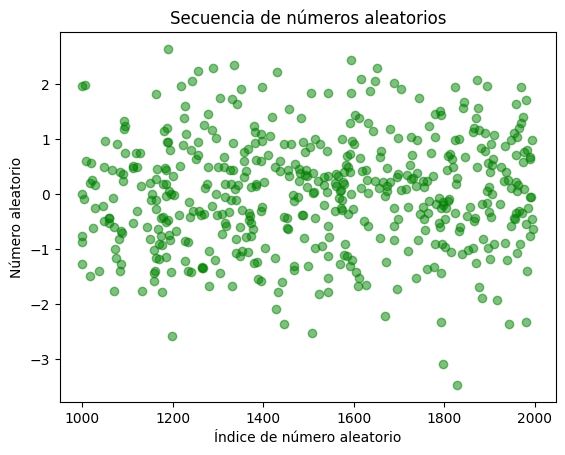

In [4]:
def plot_secuencia(numbers):
    fig, ax = plt.subplots()
    ax.scatter(
        numbers, np.random.randn(len(numbers)), c='g', alpha=0.5
    )
    plt.xlabel('Índice de número aleatorio')
    plt.ylabel('Número aleatorio')
    plt.title('Secuencia de números aleatorios')
    plt.show()

plot_secuencia(numbers)

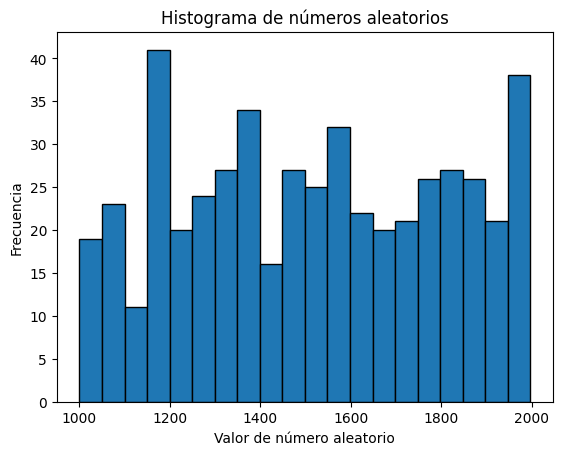

In [5]:
def plot_hist(numbers):
    plt.hist(numbers, bins=20, edgecolor='black')
    plt.xlabel('Valor de número aleatorio')
    plt.ylabel('Frecuencia')
    plt.title('Histograma de números aleatorios')
    plt.show()

plot_hist(numbers)

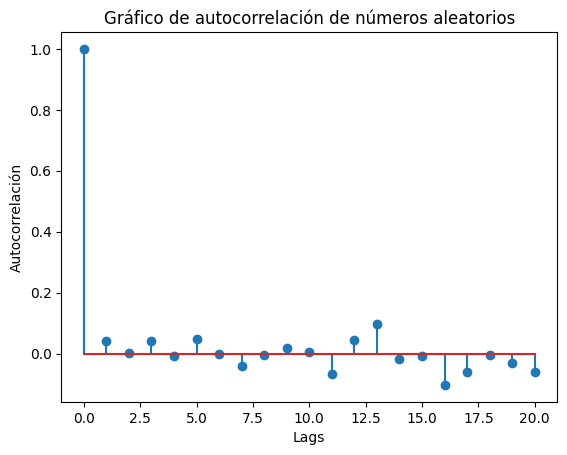

In [6]:
def plot_acf(numbers):
    autocorrelacion = sm.tsa.stattools.acf(numbers, nlags=20)

    plt.stem(autocorrelacion)
    plt.xlabel('Lags')
    plt.ylabel('Autocorrelación')
    plt.title('Gráfico de autocorrelación de números aleatorios')
    plt.show()

plot_acf(numbers)

In [7]:
def cuadrados_medios(semilla, n):
    """
    Genera una secuencia de n números aleatorios utilizando
    el método de cuadrados medios.
    La semilla inicial debe ser un número de 4 dígitos.

    Args:
        semilla: El número inicial de 4 dígitos a partir del cual se
        generará la secuencia de números aleatorios.
        n: El número de elementos de la secuencia a generar.

    Returns:
        Una lista de n números aleatorios generados utilizando el
        método de cuadrados medios.
    """
    numeros = []
    for _ in range(n):
        semilla_cuadrada = semilla ** 2
        semilla_str = str(semilla_cuadrada).zfill(8)
        mitad = len(semilla_str) // 2
        semilla = int(semilla_str[mitad-2:mitad+2])
        numeros.append(semilla / 10000)
    return numeros

In [8]:
cuadrados_medios(1234, 10)

[0.5227, 0.3215, 0.3362, 0.303, 0.1809, 0.2724, 0.4201, 0.6484, 0.0422, 0.178]

In [9]:
min_number = int(input('Ingrese el rango mínimo: '))
max_number = int(input('Ingrese el rango máximo: '))
n_numbers = int(input('Ingrese la cantidad de números a generar: '))
n_seeds = int(input('Ingrese la cantidad de semillas: '))

numbers = generator(
    range(1, n_seeds + 1), 48271, 0, 2**31 - 1, n_numbers, min_number, max_number
)

print(numbers)

plot_secuencia(numbers)
plot_hist(numbers)
plot_acf(numbers)

ValueError: invalid literal for int() with base 10: ''